In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
import warnings
# Suppress specific warning by category
warnings.filterwarnings("ignore")

In [50]:
# Load your dataset (assuming it's in a CSV format)
data = pd.read_csv('train_data (1).csv')

# Assuming your date column is named 'Date' and 'price' column has petrol prices

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Prepare the data
ts_data = data['Petrol (USD)']

# Train-test split
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Fit ARIMA model
p, d, q = 5, 1, 1  # Example ARIMA hyperparameters
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()


In [51]:
forecast = model_fit.forecast(steps=len(test_data))

In [42]:
# Convert the forecast into a DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast}, index=test_data.index)

In [53]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 142.71385260642592


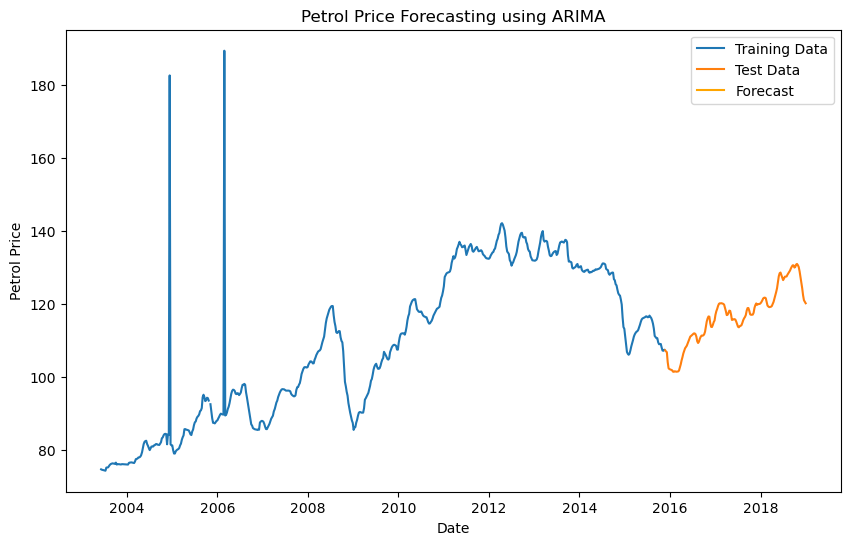

In [54]:
# Plot the forecast and actual prices
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Petrol Price')
plt.title('Petrol Price Forecasting using ARIMA')
plt.legend()
plt.show()